# Exercise 10
In this exercise, we solved the Traveling Salesman Problem for the $50$ American capitals. From the previous exercise the code has been modified to run on different nodes.
In the folders we have:
- 10.1Single $\rightarrow$ single process;
- 10.1Parallels $\rightarrow$ N parallels processes;
- 10.1Ex $\rightarrow$ N processes that every $N_{migr}=20$ generations exchange randomly their best individuals.

We used the following parameters:
- number of generations: $N_{gen}=1000$;
- number of parents: $N_{p}=500$;
- cross-over probability: $p_{s}=0.8$;
- probability for each mutation $p_m=0.03$.

To choose the individual $j$ to select, we used the following expression:
$$j=\lfloor{M \times r^p}\rfloor+1$$
where $r$ is a uniform random number $r\in[0,1)$ and $p=0.15$.

# PLOTS [6 core]

Single

rank = 0 -> Best fit of the last generation:  4745.8


rank = 0 -> Best Half Average of the last generation:  4745.8


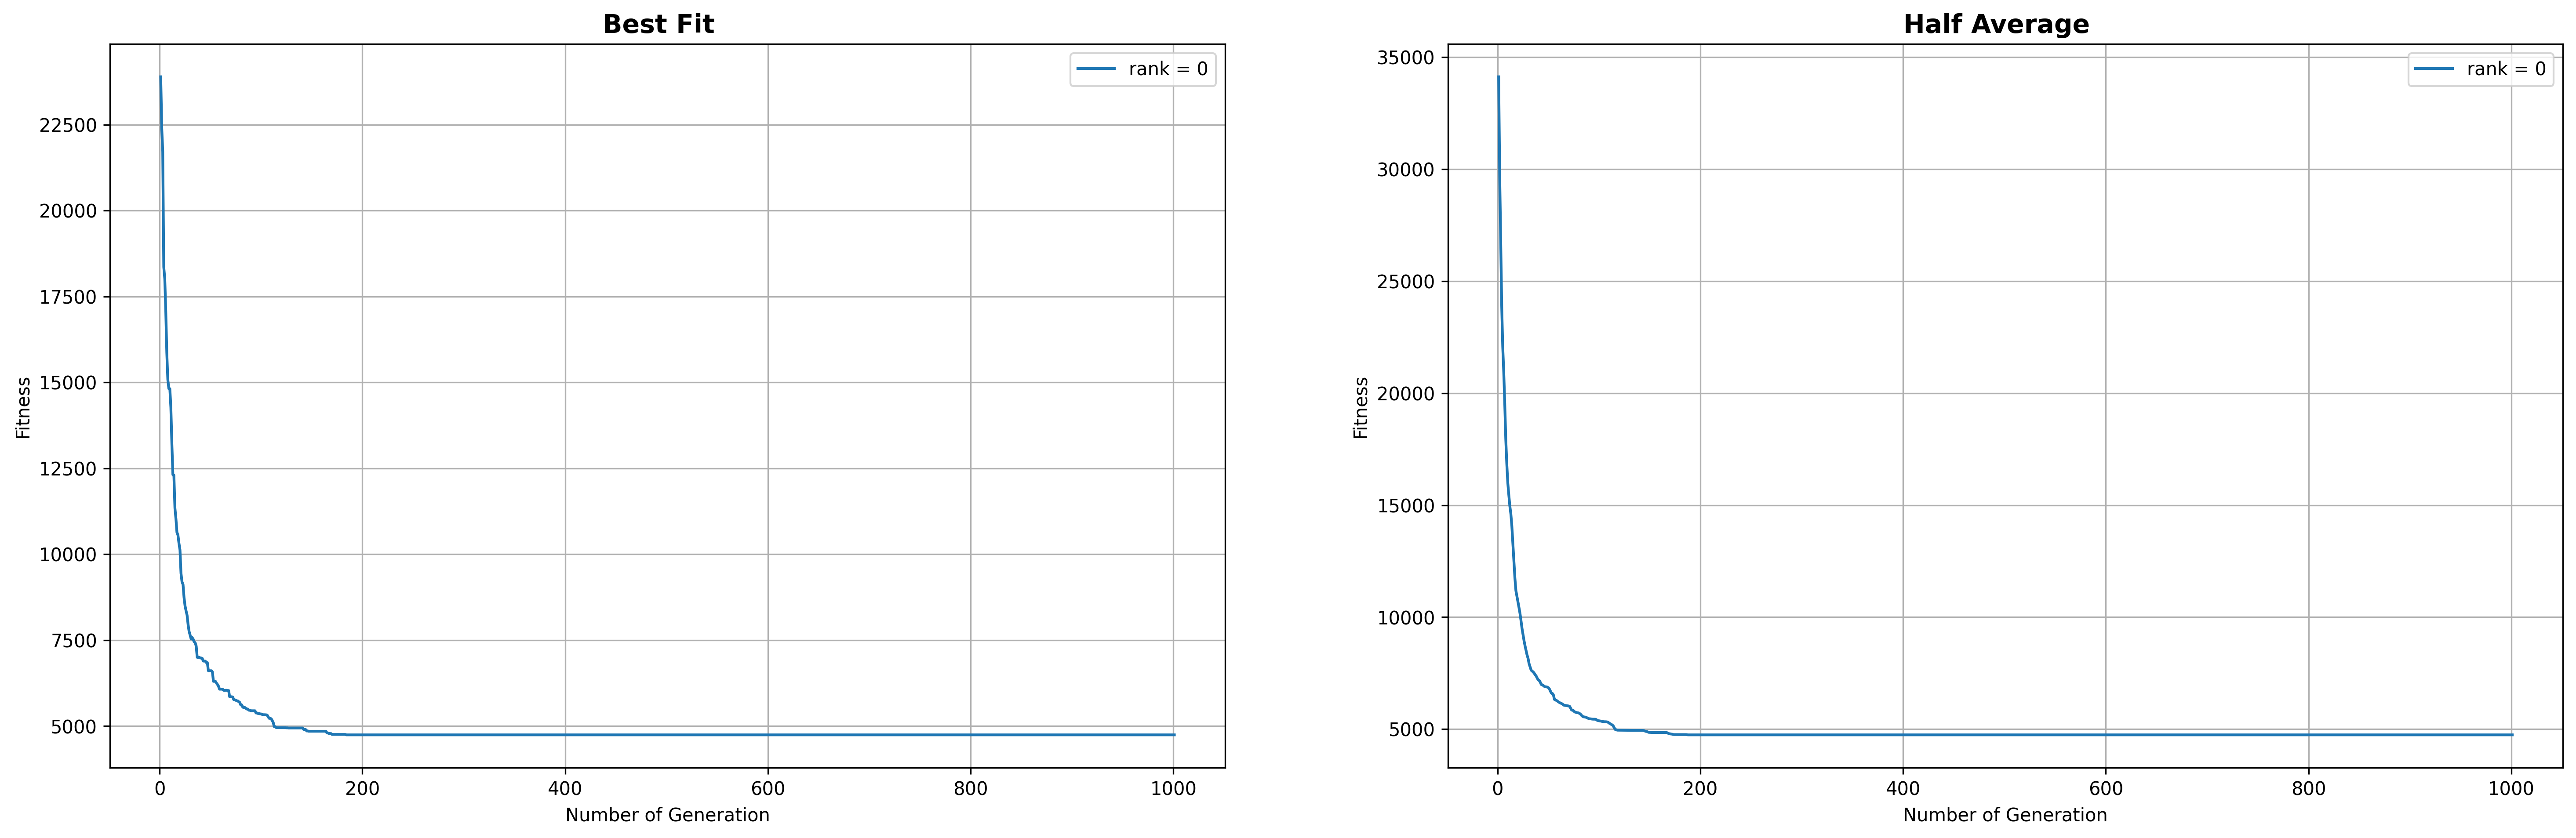


-------------------------------------

Parallels

rank = 0 -> Best fit of the last generation:  4745.8
rank = 1 -> Best fit of the last generation:  4623.36
rank = 2 -> Best fit of the last generation:  4666.04
rank = 3 -> Best fit of the last generation:  4667.02
rank = 4 -> Best fit of the last generation:  4774.33
rank = 5 -> Best fit of the last generation:  4745.38


rank = 0 -> Best Half Average of the last generation:  4745.8
rank = 1 -> Best Half Average of the last generation:  4623.36
rank = 2 -> Best Half Average of the last generation:  4666.04
rank = 3 -> Best Half Average of the last generation:  4667.02
rank = 4 -> Best Half Average of the last generation:  4774.33
rank = 5 -> Best Half Average of the last generation:  4745.38


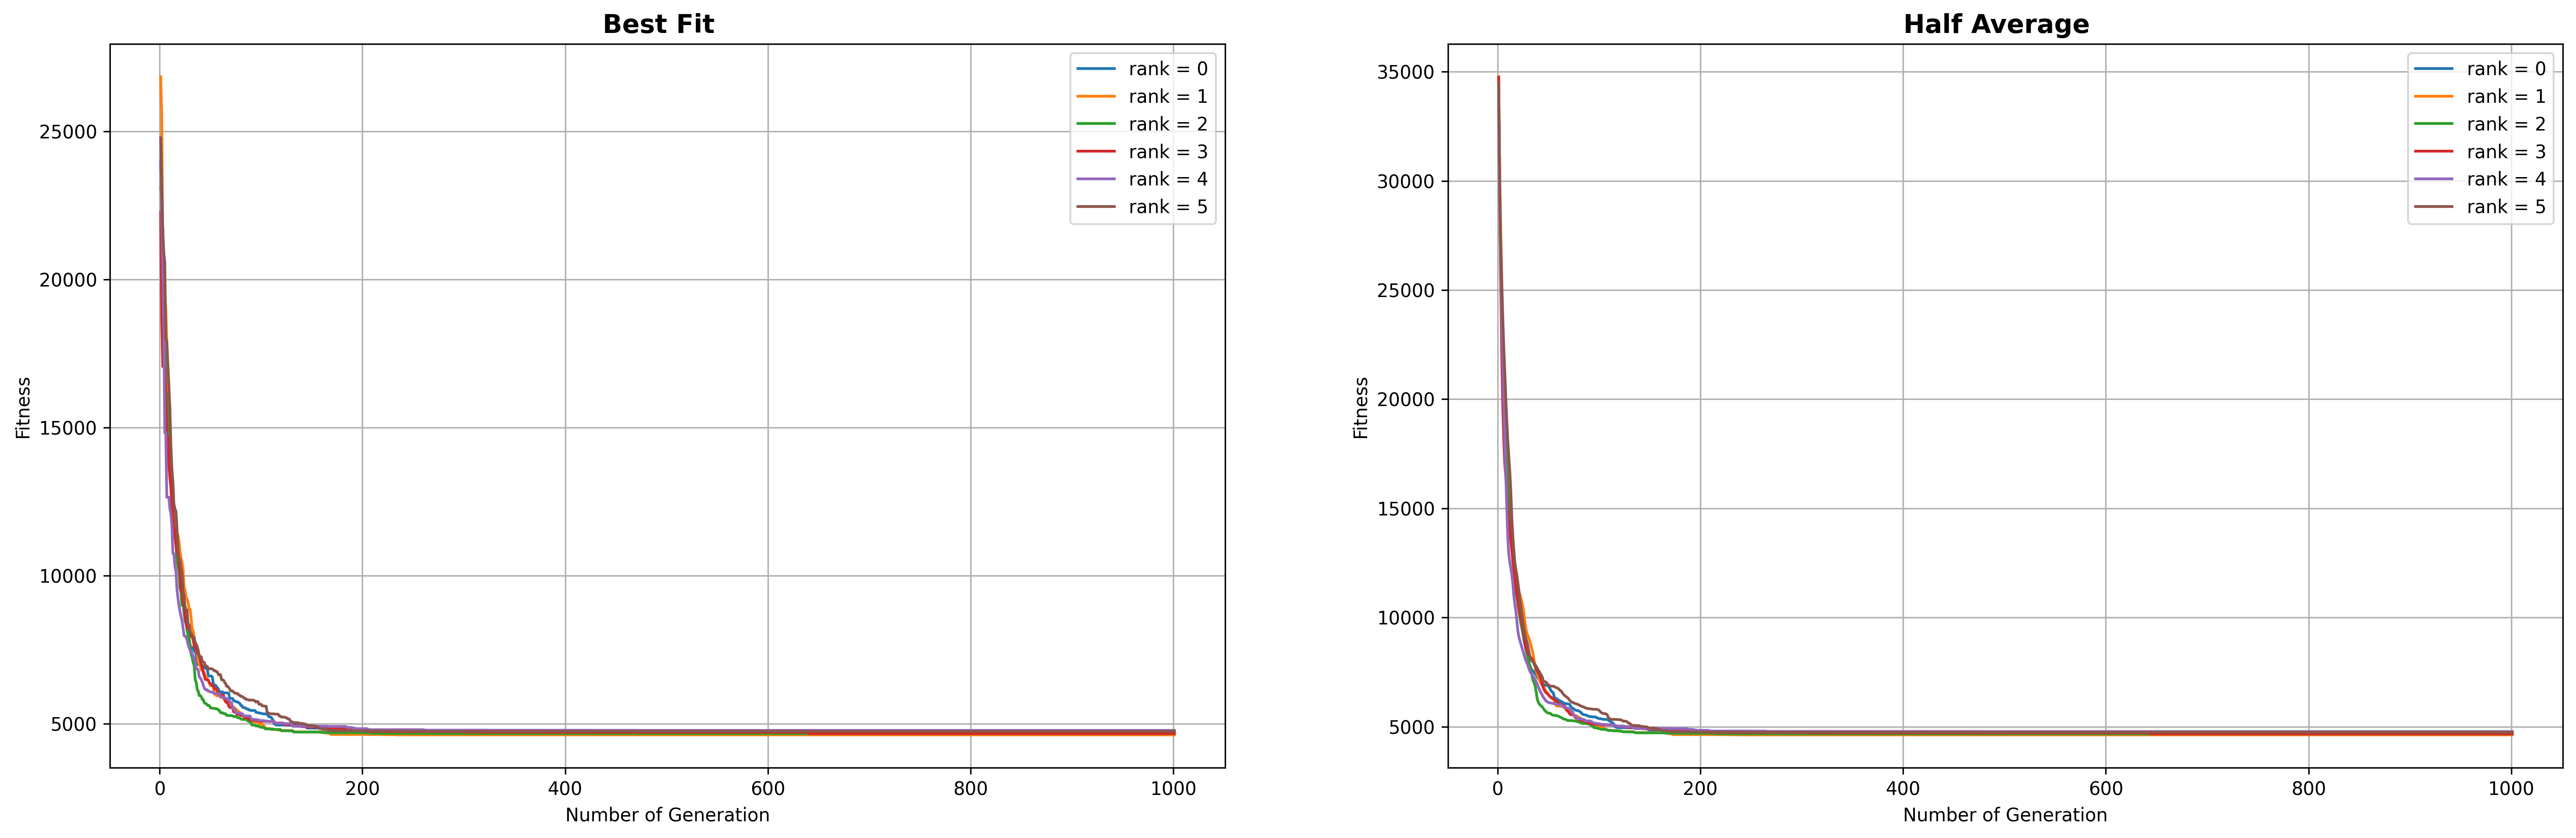


-------------------------------------

Exchange

rank = 0 -> Best fit of the last generation:  4617.9
rank = 1 -> Best fit of the last generation:  4617.9
rank = 2 -> Best fit of the last generation:  4617.9
rank = 3 -> Best fit of the last generation:  4617.9
rank = 4 -> Best fit of the last generation:  4617.9
rank = 5 -> Best fit of the last generation:  4617.9


rank = 0 -> Best Half Average of the last generation:  4617.9
rank = 1 -> Best Half Average of the last generation:  4617.9
rank = 2 -> Best Half Average of the last generation:  4617.9
rank = 3 -> Best Half Average of the last generation:  4617.9
rank = 4 -> Best Half Average of the last generation:  4617.9
rank = 5 -> Best Half Average of the last generation:  4617.9


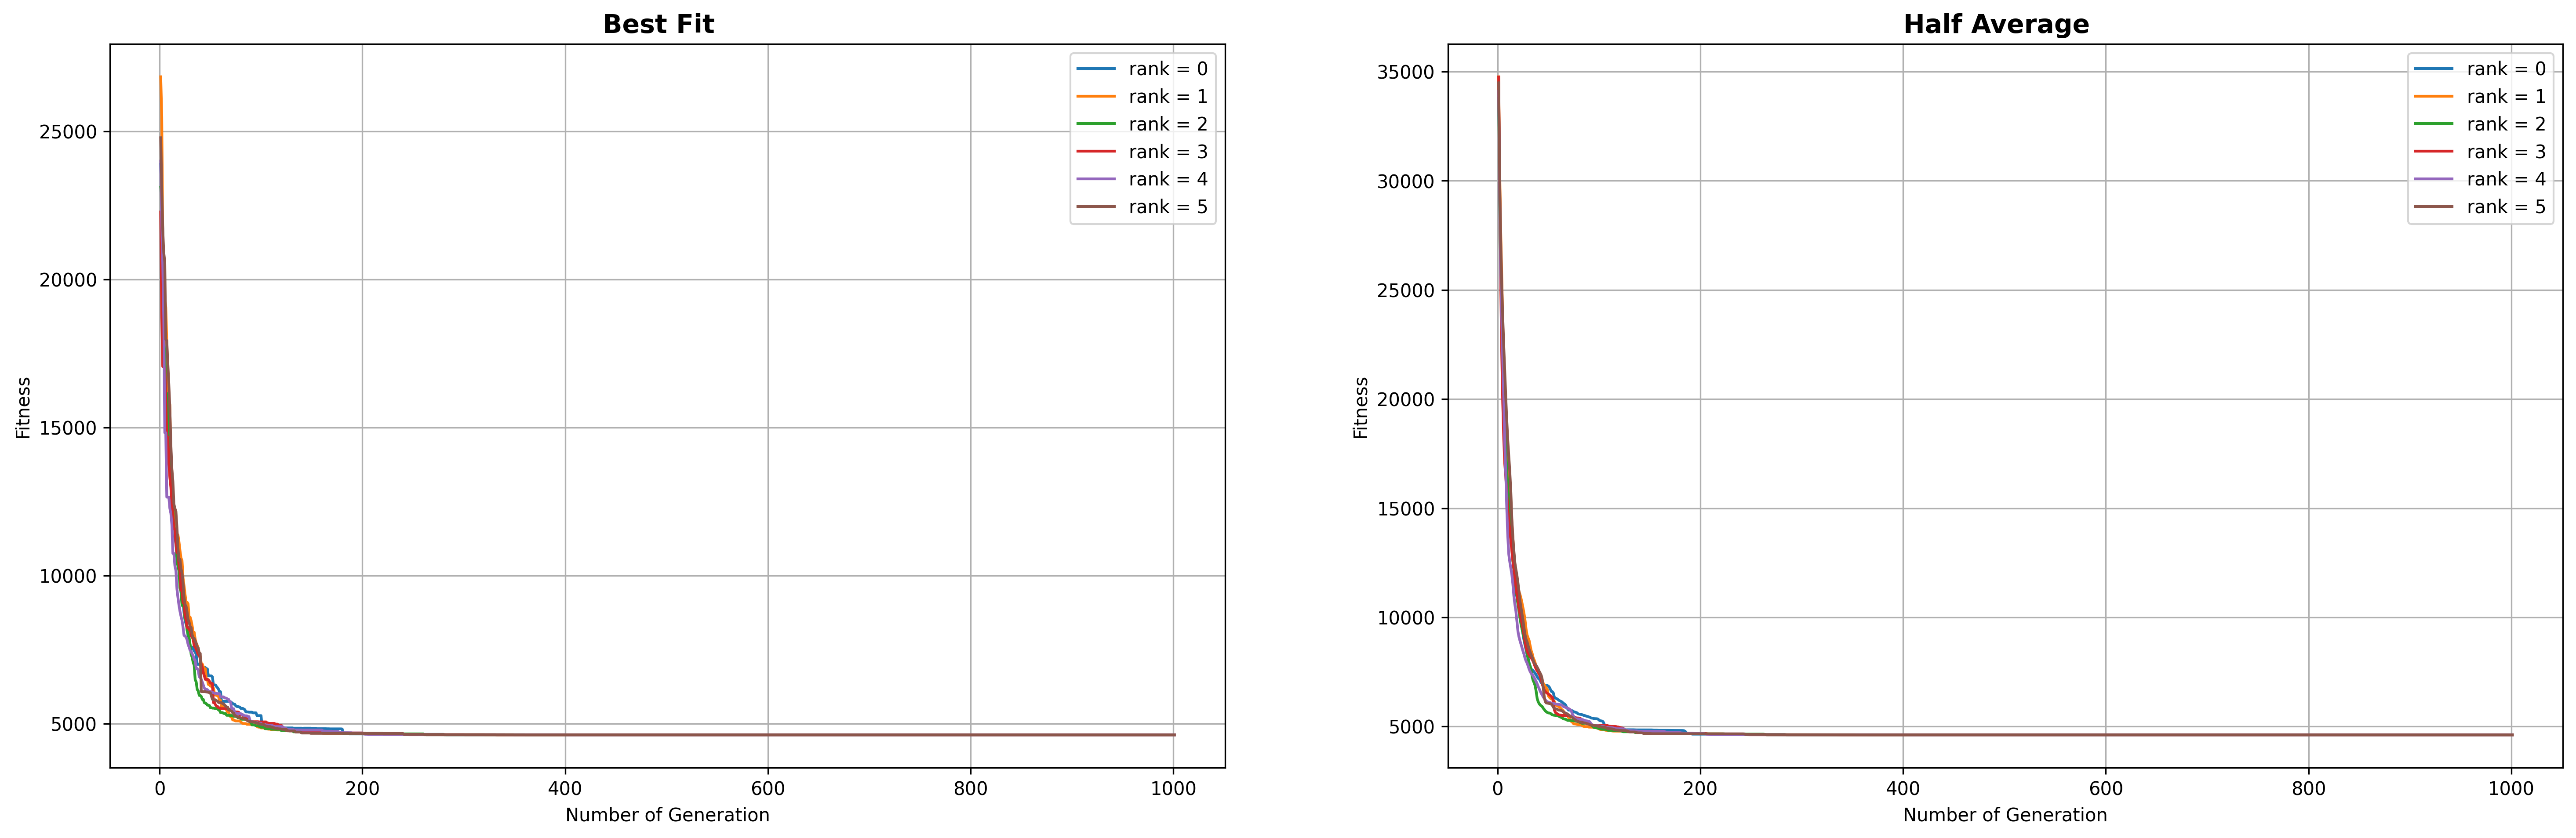


-------------------------------------



In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
import scipy.optimize 
from IPython.display import HTML
from matplotlib import animation 
from matplotlib.animation import FuncAnimation

folder=["10.1Single/America/","10.1Parallels/America/","10.1Ex/America/"]
FolderTitles=["Single","Parallels","Exchange"]
method=["America/"]
cores=[1,6,6]
Titles=["Best Fit  ","Half Average  "]

for i in folder:
    fig=plt.figure(figsize=(24,16),dpi=300)
    #Bold
    print(FolderTitles[folder.index(i)]+"\n")
    plt.subplot(2,2,1)
    for j in range(cores[folder.index(i)]):
        
        x,y = np.loadtxt(i+str(j)+"output_best.dat", usecols=(0,1), delimiter=' ', unpack='true')
        plt.plot(x,y,label="rank = "+str(j))
        print("rank =",str(j),"-> Best fit of the last generation: ",y[len(y)-1])
    plt.ylabel('Fitness')
    plt.xlabel("Number of Generation")
    plt.grid(True)
    plt.legend()
    plt.title(Titles[0],weight="bold",size="14")
    print("\n")
    plt.subplot(222)
    for j in range(cores[folder.index(i)]):
        
        x,y = np.loadtxt(i+str(j)+"HalfAverage.dat", usecols=(0,1), delimiter=' ', unpack='true')
        plt.plot(x,y,label="rank = "+str(j))
        print("rank =",str(j),"-> Best Half Average of the last generation: ",y[len(y)-1])
    plt.ylabel('Fitness')
    plt.xlabel("Number of Generation")
    plt.grid(True)
    plt.legend()
    plt.title(Titles[1],weight="bold",size="14")
    plt.show()
    print("\n-------------------------------------\n")    

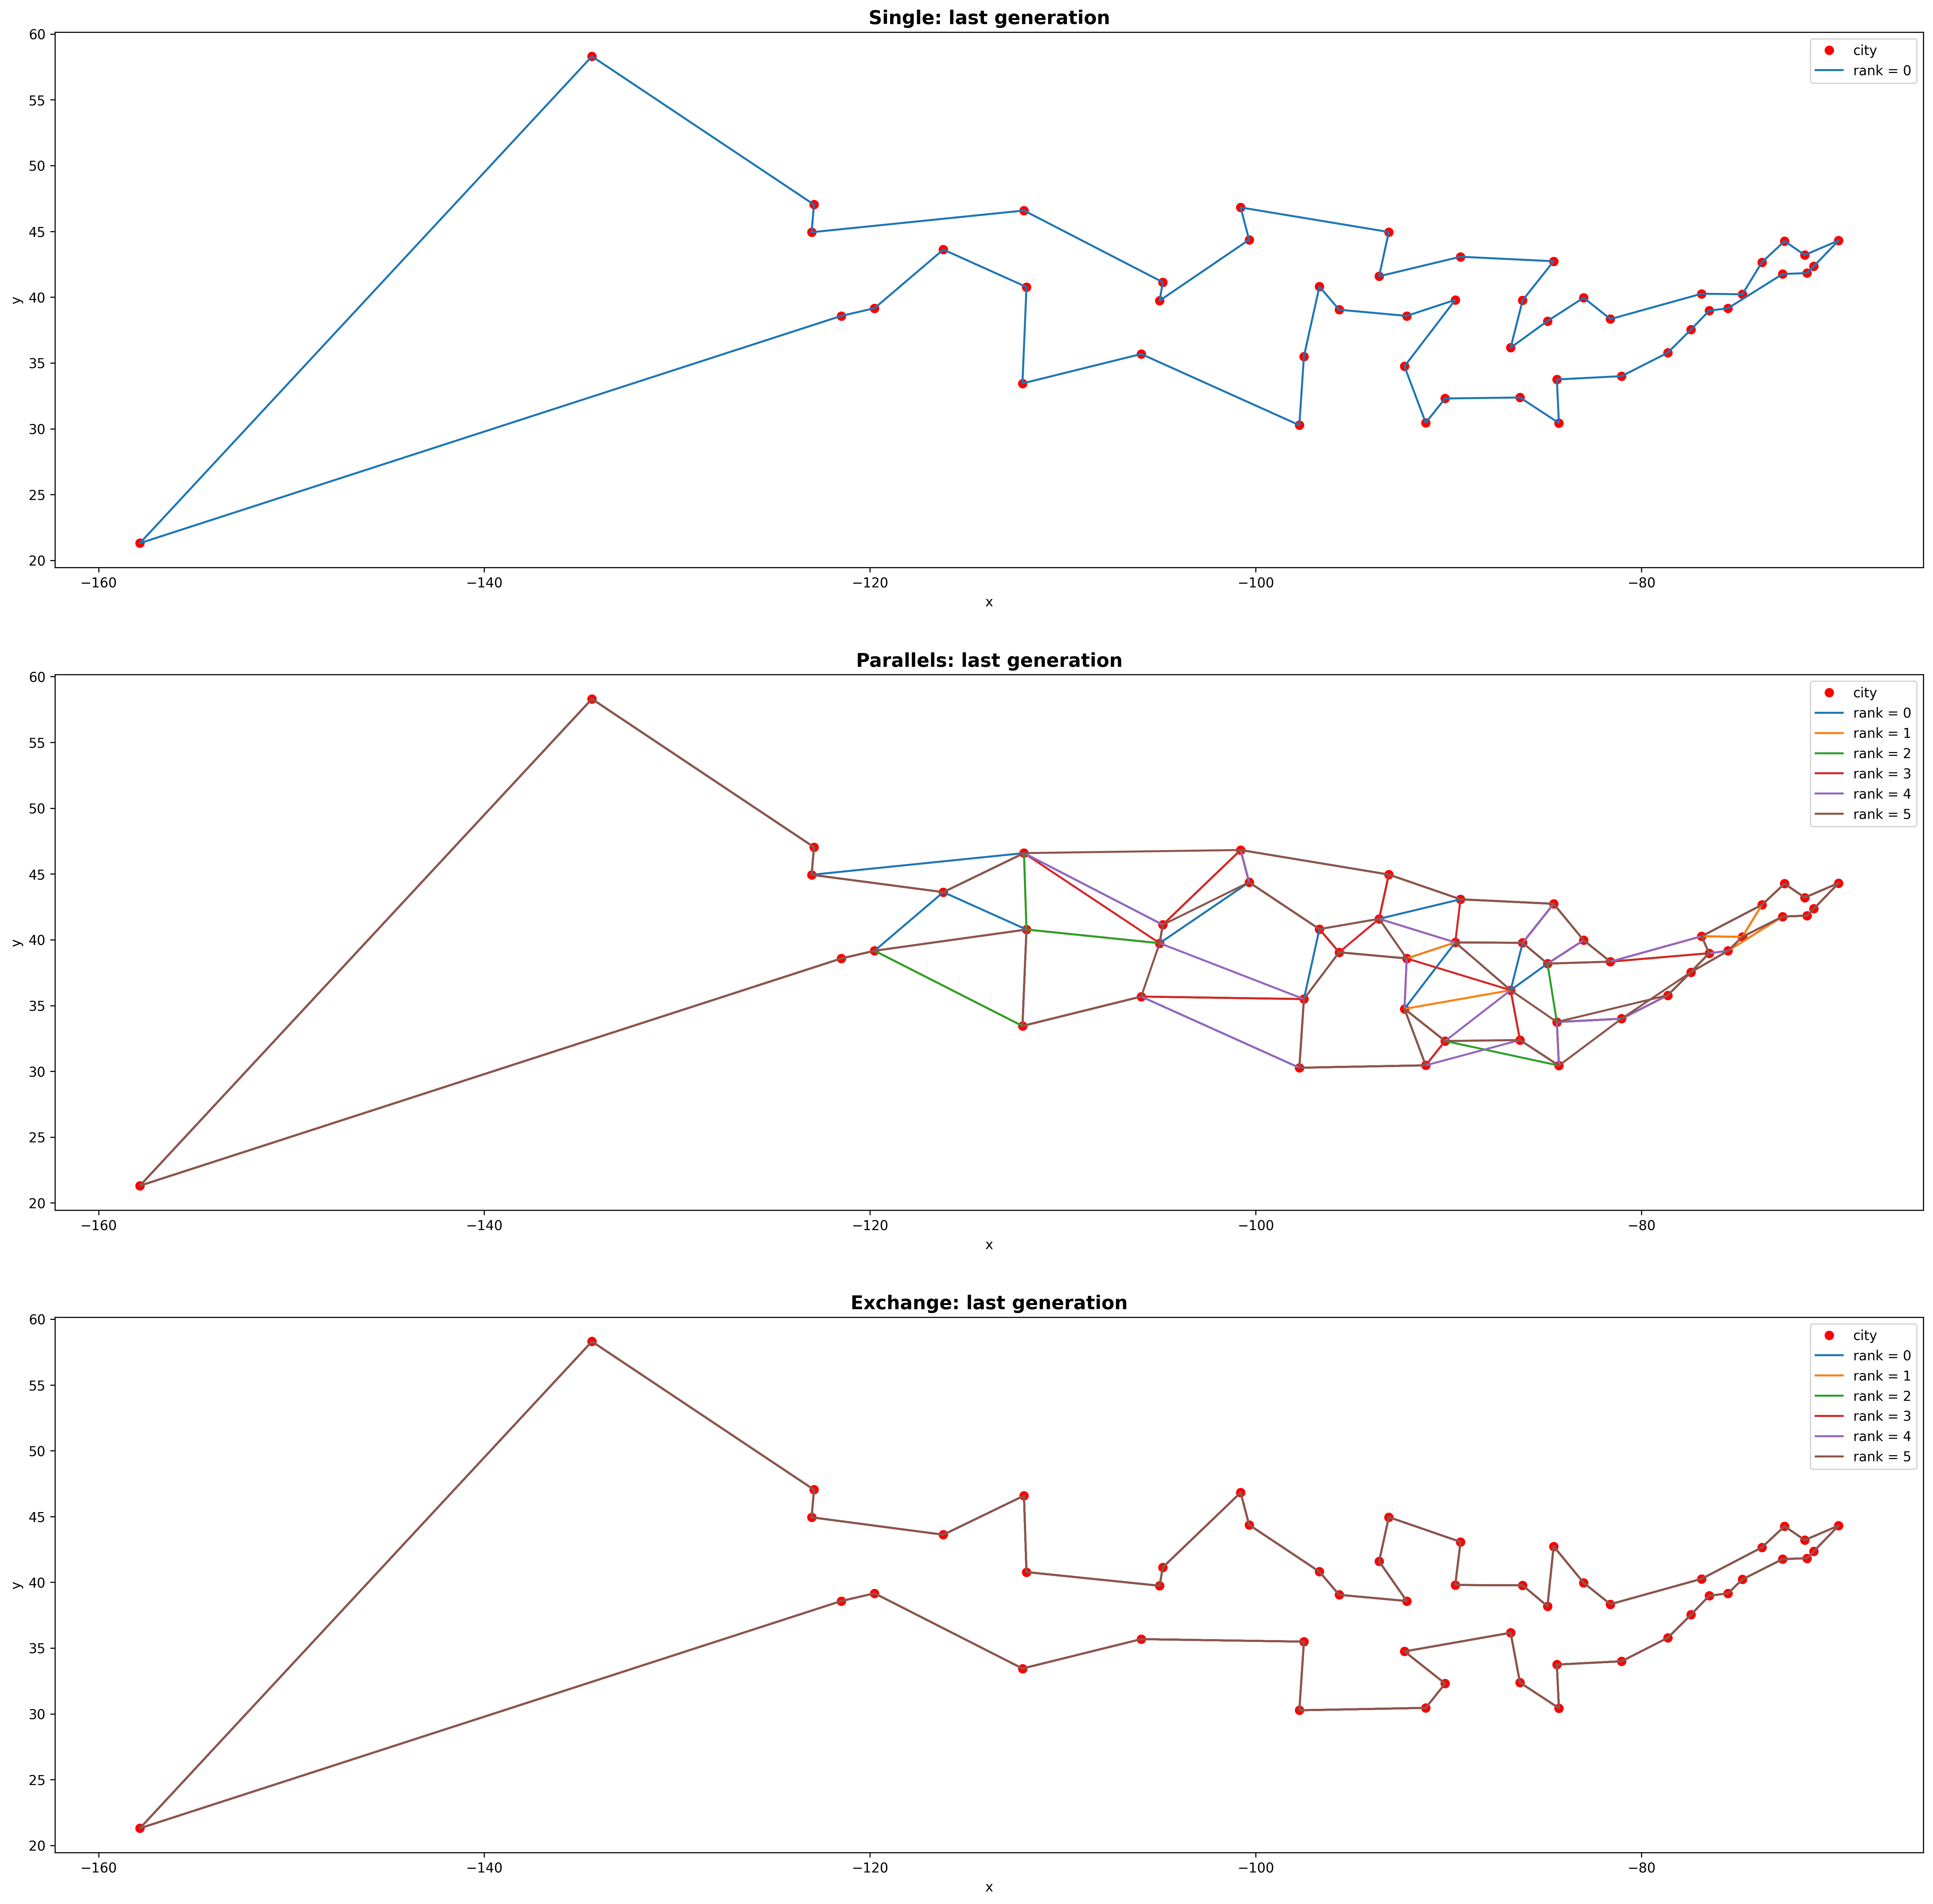

In [2]:
fig = plt.figure(figsize=(25,25),dpi=300)
for i in folder:
    t,x,y = np.loadtxt(i+"Positions.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
    #fig = plt.figure(figsize=(12,12),dpi=300)
    plt.subplot(3,1,folder.index(i)+1)
    plt.plot(x,y,marker="o",linestyle="None",color="red",label="city")
    for j in range(cores[folder.index(i)]):
    #data of best chromosome for each generation
        file=i+str(j)+"BestChr.dat"      
        data=np.loadtxt(file)
        xdata=[]
        ydata=[]
        for k in range(len(data[0])):
            xdata.append(x[int(data[len(data)-1][k])])
            ydata.append(y[int(data[len(data)-1][k])])
        xdata.append(x[int(data[len(data)-1][0])])
        ydata.append(y[int(data[len(data)-1][0])])
        plt.plot(xdata,ydata,label="rank = "+str(j))
    plt.legend()
    plt.title(FolderTitles[folder.index(i)]+": last generation",weight="bold",size="14")
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()



It is evident that the Exchange variation performed better than the other two variations.

# Animations
Note: on github this animation is not animated, but in the folder "exercise10" there is a file .gif that should work.

Number of generations:  1001


<IPython.core.display.Javascript object>


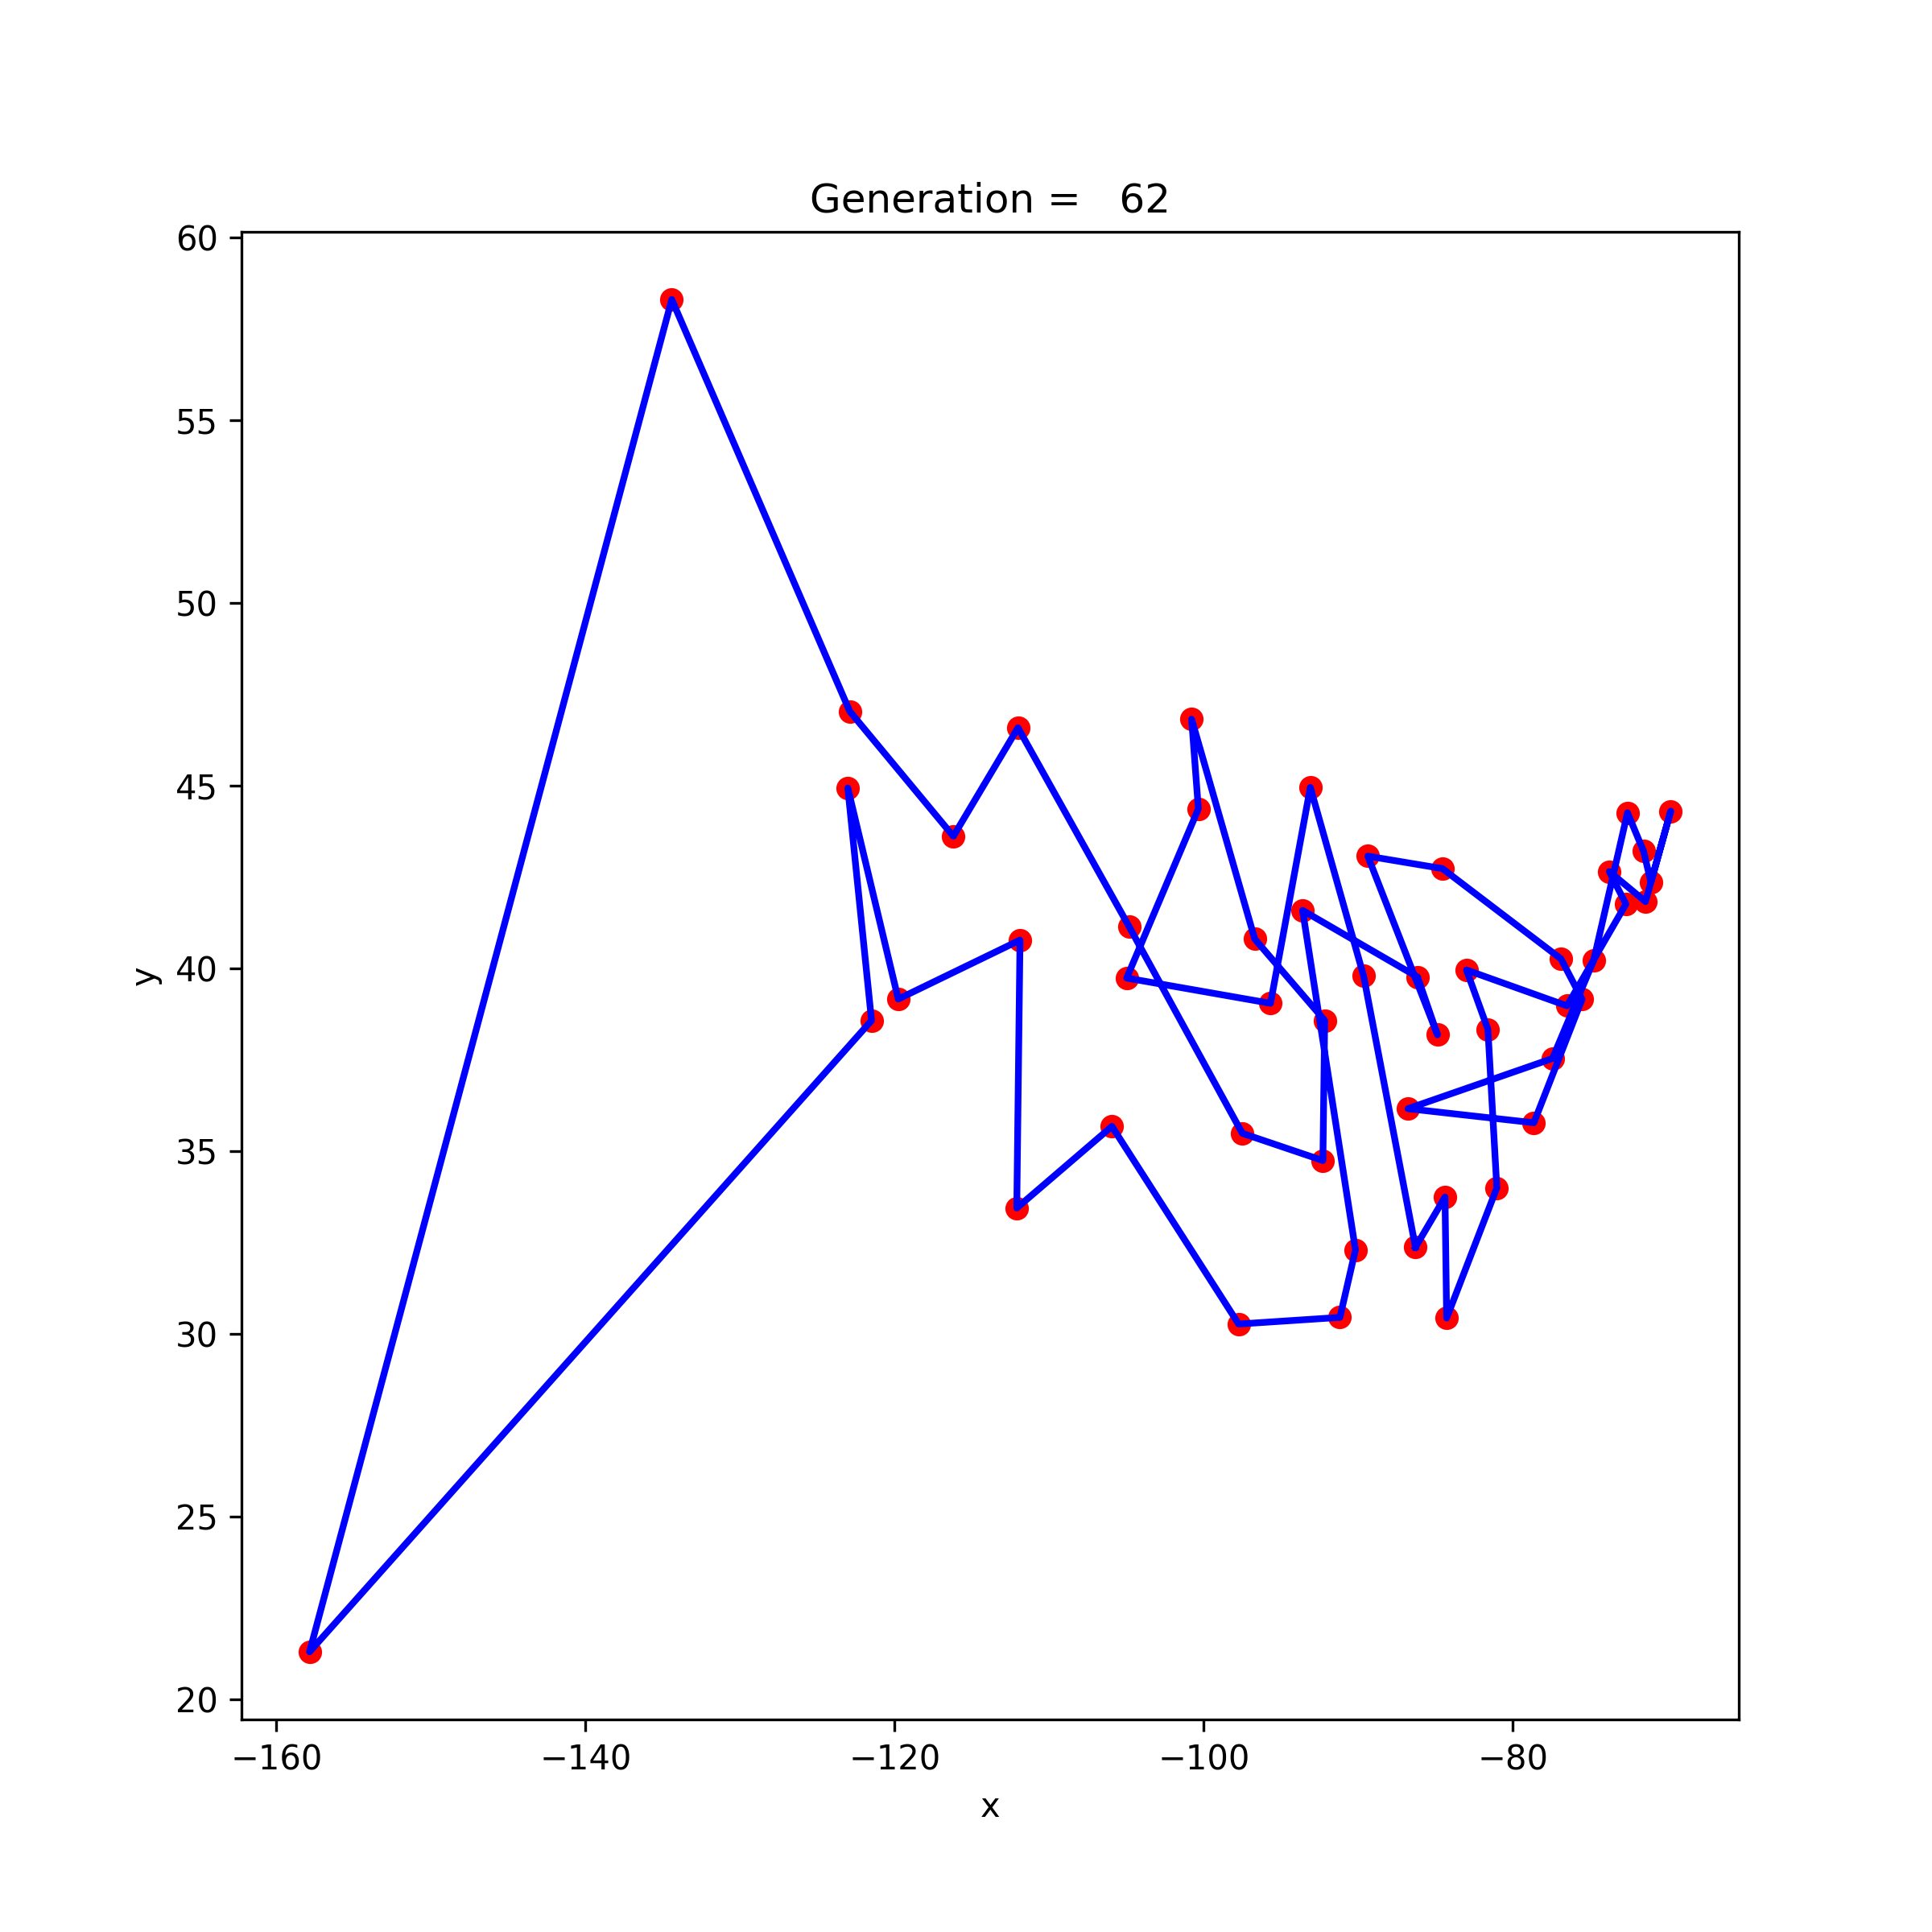

MovieWriter ffmpeg unavailable; using Pillow instead.


In [3]:
%matplotlib notebook
t,x,y = np.loadtxt("10.1Ex/America/Positions.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#data of best chromosome for each generation
data=np.loadtxt("10.1Ex/America/3BestChr.dat")
print("Number of generations: ",len(data))
fig = plt.figure(figsize=(8,8))
xdata=[]
ydata=[]
plt.plot(x,y,marker="o",linestyle="None",color="red")

line1, = plt.plot([], [], 'b', lw=2)


plt.xlabel("x")
plt.ylabel("y")
plt.title("Exchange")
def drawframe(j): 
    for i in range(len(data[0])):
        xdata.append(x[int(data[j][i])])
        ydata.append(y[int(data[j][i])])
    xdata.append(x[int(data[j][0])])
    ydata.append(y[int(data[j][0])])
    
    
    line1.set_data(xdata[0:len(data[0])+1], ydata[0:len(data[0])+1]) 
    plt.title('Generation = {0:4d}'.format(j)) 
    
    xdata.clear()
    ydata.clear()
    
    return (line1)



# blit=True re-draws only the parts that have changed. 
anim = animation.FuncAnimation(fig, drawframe, frames=len(data), interval=50, blit=True)
plt.show()

anim.save('America.gif')
#HTML(anim.to_html5_video())

